Importamos librerias necesarias

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

- Solicitar al usuario ingresar el valor aleatorio para realizar el calculo automatico de la matriz de transición.
- El número de 'usuarios' estara sujeto al valor ingresado.
- Definicion de variables: 
    - conectarse = 0.4
    - desconectarse = 0.3
    
    Las cuales son las probabilidades de conectarse y desconectarse

In [35]:
# Se pide el numero de usuarios
usuario = input("\nNumero de usuarios: ")
# Se convierte en entero
filas = int(usuario)

columnas = filas
matriz = []

p_conectado = 0.4
p_desconectado = 0.3

Se crea una función 'binomial' para realizar y almacenar los calculos de las combinatorias
resultantes de la formula de DISTRIBUCION BINOMIAL.

In [36]:
# Se construye la ecuacion binomial 
def binomial(x, n, p):
    factoriales = math.factorial(n) / (math.factorial(x)*math.factorial(n-x))
    probabilidades = p**x * (1-p)**(n-x)
    return probabilidades*factoriales

A continuación, se realiza el cálculo de las probabilidades de la matriz con ciclos y condiciones
donde se asignan los valores de las probabilidades dependiendo del estado actual y hacia a dónde
se desea llegar.

Para esto invocamos la funcion de combinatoria en la formula de distribucion binomial
y se le asignan las probabilidades de las variables definidas anteriormente.

In [37]:
# Se construye una matriz para almacenar los datos resultantes de las probabilidades
for i in range(0, filas+1):
    for j in range(0, columnas+1):
        if (i == 0):
            matriz.append(binomial(j, filas, p_conectado))
        elif (j == 0) and (i > 0) and (i != filas):
            matriz.append(binomial(j+i, i, p_desconectado)*binomial(j, filas-i, p_conectado))
        elif (j < i) and (i > 0) and (j != 0) and (i != filas):
            matriz.append(binomial(j, i, p_desconectado))
        elif (j == i) and (i > 0) and (i != filas):
            matriz.append(binomial(j, i, p_desconectado)*binomial(j, i, p_conectado) + binomial(0, i, p_desconectado)*binomial(0, filas-i, p_conectado))
        elif (j > i) and (i > 0) and (i != filas):
            matriz.append(binomial(0, i, p_desconectado)*binomial(j-i, filas-i, p_conectado))
        elif (i == filas):
            matriz.append(binomial(i-j, filas, p_desconectado))

Se imprimen los resultados para el número de usuarios en total
los valores de las probabilidades se redondean.

In [38]:
matriz1 = np.array(matriz).reshape(filas+1, columnas+1)


print("Matriz de transición\n",matriz1)

print("\nSuma de las probabilidades de cada fila:")

print("")
for i in range(0, filas+1):
    acu = 0
    print("|" ,end="")
    for j in range(0, columnas+1):
        print("p", i, j, "=", round(matriz1[i][j], 3), " | ", end="")
        acu = acu+matriz1[i][j]
    print("\033[0;32m", "--> TOTAL: ", round(acu, 1), "\033[0;m")
    print("\n")





Matriz de transición
 [[0.1296   0.3456   0.3456   0.1536   0.0256  ]
 [0.0648   0.2712   0.3024   0.2016   0.0448  ]
 [0.0324   0.42     0.1908   0.2352   0.0784  ]
 [0.0162   0.441    0.189    0.207528 0.1372  ]
 [0.0081   0.0756   0.2646   0.4116   0.2401  ]]

Suma de las probabilidades de cada fila:

|p 0 0 = 0.13  | p 0 1 = 0.346  | p 0 2 = 0.346  | p 0 3 = 0.154  | p 0 4 = 0.026  |  --> TOTAL:  1.0 


|p 1 0 = 0.065  | p 1 1 = 0.271  | p 1 2 = 0.302  | p 1 3 = 0.202  | p 1 4 = 0.045  |  --> TOTAL:  0.9 


|p 2 0 = 0.032  | p 2 1 = 0.42  | p 2 2 = 0.191  | p 2 3 = 0.235  | p 2 4 = 0.078  |  --> TOTAL:  1.0 


|p 3 0 = 0.016  | p 3 1 = 0.441  | p 3 2 = 0.189  | p 3 3 = 0.208  | p 3 4 = 0.137  |  --> TOTAL:  1.0 


|p 4 0 = 0.008  | p 4 1 = 0.076  | p 4 2 = 0.265  | p 4 3 = 0.412  | p 4 4 = 0.24  |  --> TOTAL:  1.0 




Graficamos la matriz de transición

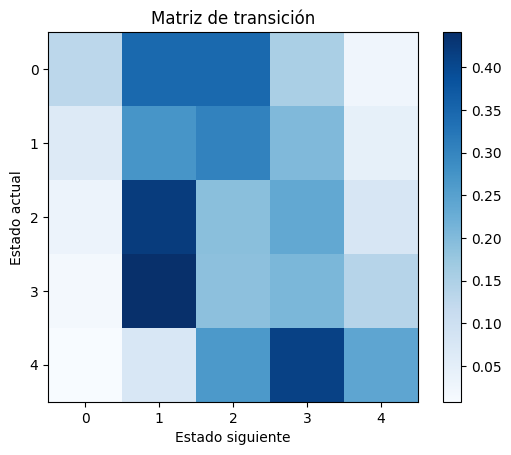

In [39]:
plt.imshow(matriz1, cmap='Blues')
plt.title('Matriz de transición')
plt.xlabel('Estado siguiente')
plt.ylabel('Estado actual')
plt.colorbar()
plt.show()

Mapa de calor

<AxesSubplot:>

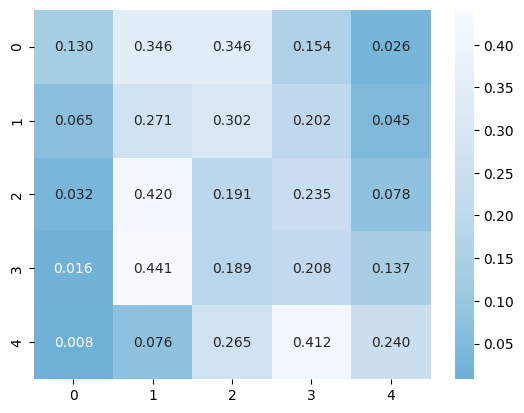

In [40]:
sns.heatmap(matriz1, center=0, cmap='Blues_r', annot=True, fmt='.3f')